<a href="https://colab.research.google.com/github/vikavikulova/yandex_projects/blob/main/DL_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Тестовое задание для «Деловых линий»**

Переделайте или уточните графики, сделайте их более читаемыми и менее “врущими”, чтобы Ваша аудитория не попалась на удочку авторов отчета. 

---



**Задание 1**

Сотрудники компании Shmuber, основанной в 2008 году и которая опубликовала свою отчетность, принесли Вам некоторую её часть для публикации в вашем СМИ. Вы уже "собаку съели" на похожих задачах и сразу видите, что графики на самом деле не дают явного ответа на возможные вопросы читателя отчета.

**Дополнительное задание:** опишите, какую дополнительную информацию Вы бы запросили.

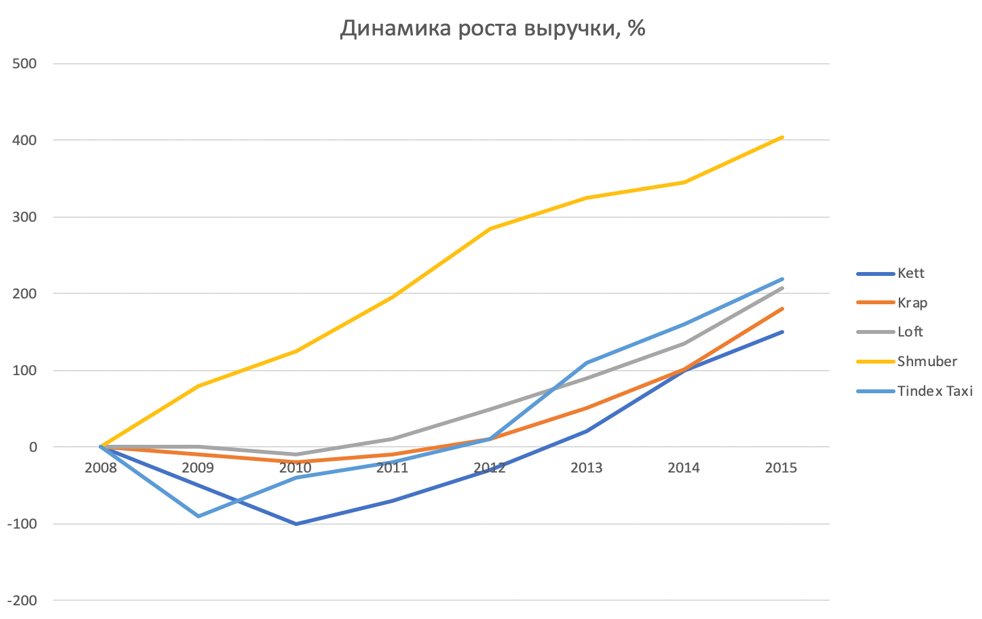

Загрузим библиотеки для работы и импортируем данные:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#импортируем warnings, чтобы Pandas не выдавал предупреждения
import warnings 
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DL/DL_1.xlsx')

In [8]:
df.head(10)

,year,company,"revenue, $K",rate
0,2008,Shmuber,5,1
1,2008,Kett,1000,1
2,2008,Tindex Taxi,890,1
3,2008,Krap,899,1
4,2008,Loft,760,1
5,2009,Shmuber,85,80
6,2009,Kett,950,-50
7,2009,Tindex Taxi,800,-90
8,2009,Krap,890,-9
9,2009,Loft,760,0


Исходный график, полученный от компании Shmuber, якобы описывет рост выручки в процентах. Может создаться ложное впечатление, что Shmuber — лидер на рынке, потому как выручка постоянно растет. Компания показывает исключительно положительные финансовые результаты, в отличие от своих конкурентов, у которых наблюдаются падения в 2009–2010 г.

Но график содержит ошибки:
* в заголовке графика указана динамика в процентах. Но в исходных данных в столбце `rate` вычислена *разница* в выручке, а не проценты. 

* эта разница вычисляется в сравнении с показателями **2008 года** — такое сравнение не совсем корректно, оно никак не отражает реальное положение дел на рынке. 

Построим график и посмотрим, как в действительности менялась выручка в 2008–2015 г.:

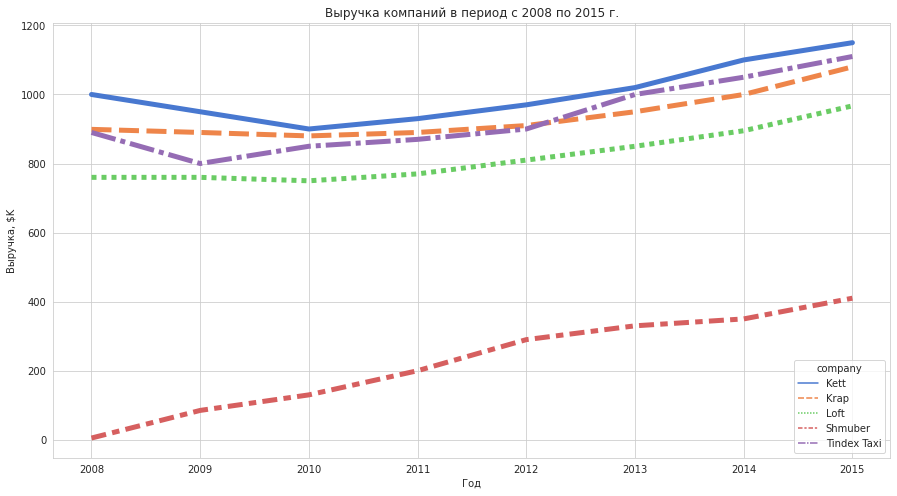

In [9]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 8))
sns.lineplot(
    data=df.pivot_table(
        index="year", columns="company", values="revenue, $K", aggfunc="sum"
    ),
    linewidth=5,
    palette="muted",
)
plt.title("Выручка компаний в период с 2008 по 2015 г.")
plt.xlabel("Год")
plt.ylabel("Выручка, $K")
plt.show()

* Компания Shmuber в 2008 году только вышла на рынок, поэтому ее показатели в этот период гораздо меньше, чем у конкурентов. 
* К 2009–2010 г. только Shmuber показывала рост выручки, у других компаний видим падения.
* Тем не менее, к 2015 году компания Shmuber все еще значительно уступает другим компаниям по выручке, более чем в 2 раза. Ее конкуренты после 2010 года только росли, хоть и не так стремительно, как Shmuber. 

Посмотрим на динамику роста выручки компаний, но сравнивать будем не с показателями 2008 года, а с предыдущим периодом: 

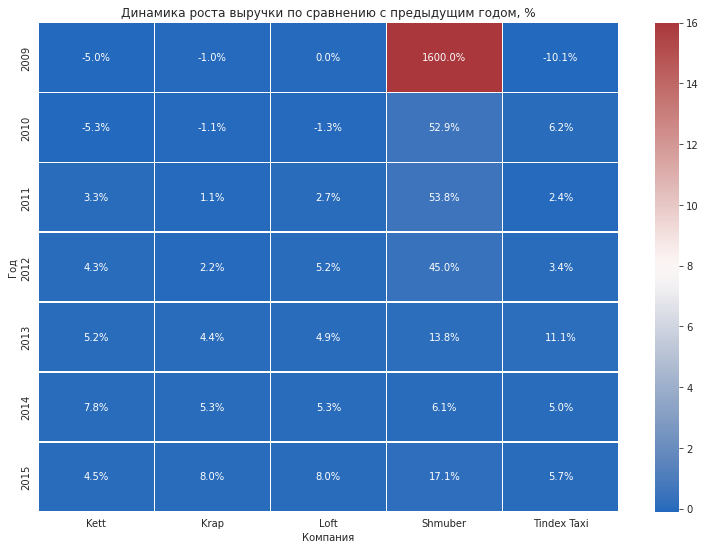

In [10]:
plt.figure(figsize=(13, 9))
sns.heatmap(
    data=df.pivot_table(index="year", columns="company", values="revenue, $K")
    .pct_change()
    .dropna(axis="index"),
    annot=True,
    fmt=".1%",
    cmap="vlag",
    linewidths=.5,
)
plt.title("Динамика роста выручки по сравнению с предыдущим годом, %")
plt.xlabel("Компания")
plt.ylabel("Год")
plt.show()

* В 2009 году Shmuber увеличила свою выручку по сравнению с 2008 годом на **1600 %**. Конкуренты либо сохранили свои позиции, либо потеряли от 5 до 10 %.
* В период с 2010 по 2012 год Shmuber продолжала показывать неплохие результаты: в первые два года выручка росла на 53 %, в 2012 — на 45 %. Конкуренты в это время либо теряли в выручке (но не более 5 %), либо немного ее увеличивали (не более 6 %).
* С 2013 года Shmuber перестала так стремительно расти. У всех компаний в этот период наблюдаем только увеличение выручки. 


---

Мы не располагаем информацией о том, сколько компании-конкуренты Shmuber существуют на рынке. Их клиенты, возможно, проявили лояльность и не стали переходить к неизвестному стартапу.  

В то же время Shmuber поначалу показывала неплохой рост относительно своих конкурентов. Мы не знаем, что могло способствовать такому взрывному росту: стоимость услуг, удобное мобильное приложение, успешные рекламные кампании, бонусы? Возможно, конкуренты успешно адаптировались и стали использовать похожую модель? 

Также стоит отметить, что сами по себе показатели выручки мало говорят о реальном состоянии дел компании. Нам нужно больше информации о финансовых показателях: например, о валовых и операционных расходах. 

---

**Задание 2.** 

Одна консалтинговая компания попросила вас опубликовать годовую статистику о результатах работы компаний на рынке бытовой техники и прислала вам диаграмму из их отчета. Вы как опытный профессионал задумались перед тем, как публиковать этот материал, как следует изменить визуализацию, чтобы она отражала реальное положение вещей?

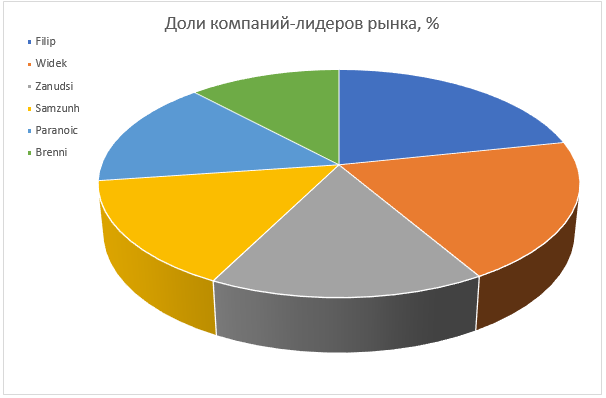

Импортируем исходную таблицу:

In [11]:
t = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DL/DL_2.xlsx', sheet_name='задание 2', header=1)

In [12]:
t

,company,"revenue, $M","share, %",year
0,Filip,109.0,0.082953,2019.0
1,Widek,100.0,0.076104,2019.0
2,Zanudsi,80.0,0.060883,2019.0
3,Samzunh,77.0,0.058600,2019.0
4,Paranoic,77.0,0.058600,2019.0
5,Brenni,60.0,0.045662,2019.0
6,others,811.0,0.617199,2019.0


Приведем данные к нужным форматам:

In [13]:
t['revenue, $M'] = t['revenue, $M'].astype('int')
t['year'] = t['year'].astype('int')
t['share, %'] = (t['share, %']*100).round(2)

In [14]:
t

,company,"revenue, $M","share, %",year
0,Filip,109,8.30,2019
1,Widek,100,7.61,2019
2,Zanudsi,80,6.09,2019
3,Samzunh,77,5.86,2019
4,Paranoic,77,5.86,2019
5,Brenni,60,4.57,2019
6,others,811,61.72,2019


Главная проблема в исходном графике — не учтены другие компании, `others`. Соотвественно, доли изображены не от общего количества. Более того, не указаны и процентные значения. В результате может показаться, что шесть указанных компаний делят весь рынок между собой.

Построим корректный график, который будет учитывать все данные из таблицы:

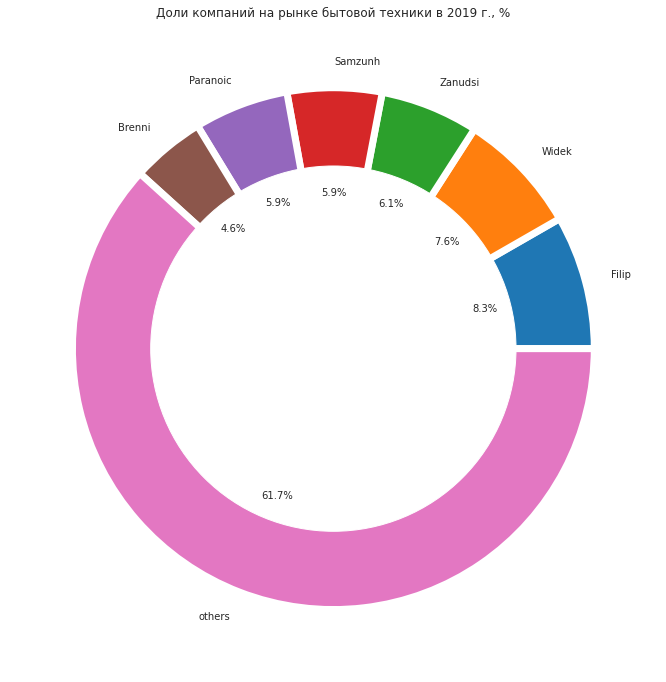

In [33]:
plt.figure(figsize=(12, 12))
plt.pie(
    t["share, %"],
    labels=t["company"],
    autopct="%.1f%%",
    wedgeprops={"linewidth": 7, "edgecolor": "white"},
)
my_circle = plt.Circle((0, 0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Доли компаний на рынке бытовой техники в 2019 г., %")
plt.show()

Глядя на этот график, сложно назвать указанные компании «лидерами» — все-таки больше половины рынка бытовой техники — <br>61,7 % — у других (*others*) компаний. 

Мы можем сравнить доли компаний-лидеров на рынке между собой можно с помощью других графиков.

Сначала создадим таблицу с компаниями-лидерами (удалим строку `others`):

In [16]:
liders = t.drop(index=6)

In [17]:
liders

,company,"revenue, $M","share, %",year
0,Filip,109,8.30,2019
1,Widek,100,7.61,2019
2,Zanudsi,80,6.09,2019
3,Samzunh,77,5.86,2019
4,Paranoic,77,5.86,2019
5,Brenni,60,4.57,2019


Построим графики с информацией о компаниях-лидерах рынка:

In [18]:
fig = make_subplots(
    rows=1,
    cols=2,
    shared_yaxes=False,
    subplot_titles=(
        "Выручка компаний-лидеров, млн долларов",
        "Доли компаний-лидеров на рынке от общего числа, %",
    ),
)

fig.add_trace(
    go.Bar(
        x=liders["company"],
        y=liders["revenue, $M"],
        text=liders["revenue, $M"],
        textfont_color="white",
        marker=dict(color="#efa3a3"),
    ),
    1, 1,
)
fig.add_trace(
    go.Bar(
        x=liders["company"],
        y=liders["share, %"],
        text=liders["share, %"],
        textfont_color="white",
        marker=dict(color="#80adcc"),
    ),
    1, 2,
)

fig.update_xaxes(title_text="Компания", row=1, col=1)
fig.update_xaxes(title_text="Компания", row=1, col=2)
fig.update_yaxes(title_text="Выручка, $M", row=1, col=1)
fig.update_yaxes(title_text="Доля на рынке, %", row=1, col=2)

fig.update_layout(
    height=600,
    width=1200,
    title_text="Показатели компаний-лидеров на рынке бытовой техники в 2019 году",
    showlegend=False,
)
fig.show()